# Power Spectrum


In [1]:
import numpy as np
import pycic

import matplotlib.pyplot as plt
plt.style.use('ggplot')

pk_tab = np.loadtxt("./data/power.csv", delimiter = ',')
pso    = pycic.cicPowerSpectrum(pk_tab)

pso.normalise(0.8) # normalise the power with sigma8 = 0.8

def linpower(k):
    """ return the normalised linear power """
    return pso.power(np.log(k), normalise = True)

# let kn = 2 h/Mpc
kn  = 2.

mps = pycic.cicMeasPowerSpectrum(linpower, kn = kn, )

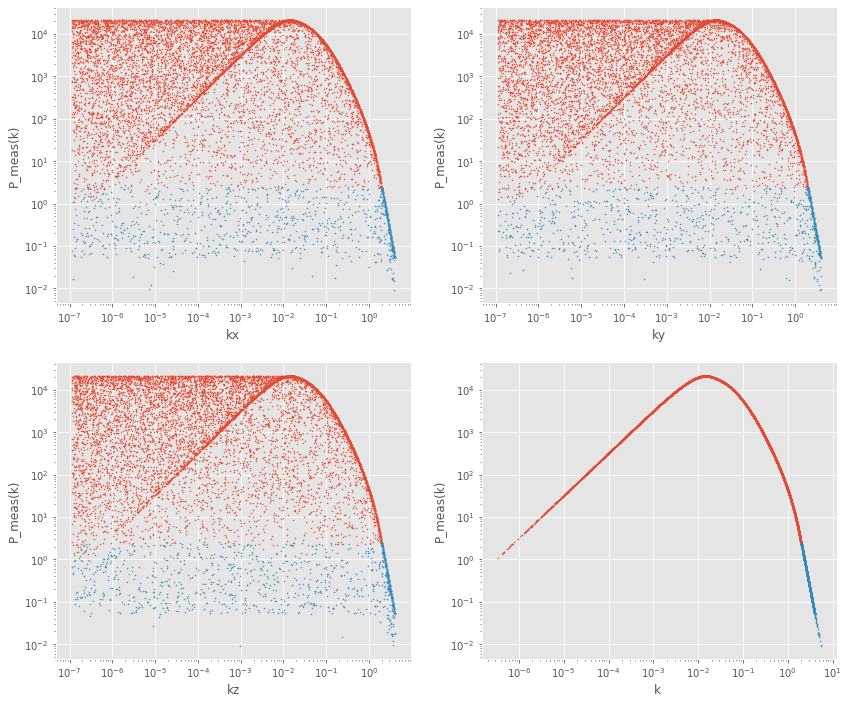

In [31]:
# all k vectors
kvec = np.exp(np.random.uniform(-16, np.log(2*kn), (10000, 3)))
klen = np.sqrt(np.sum(kvec**2, axis = -1))

# full power spectrum (power law contd.)
mpk = mps(kvec)

fig, axs = plt.subplots(2, 2, figsize = (14, 12))

for _axi, _ki, _i in zip(axs.flatten(), [*kvec.T, klen], "xyz "):
    mask = np.where(klen < kn, True, False)
    _axi.loglog(_ki[mask], mpk[mask], 'o', ms = .5, color = 'C0')
    _axi.loglog(_ki[~mask], mpk[~mask], 'o', ms = .5, color = 'C1')
    _axi.set_xlabel('k' + _i); _axi.set_ylabel('P_meas(k)')
        

plt.show()

In [32]:
from scipy.stats import binned_statistic

lnp, lnk, _ = binned_statistic(np.log(klen), np.log(mpk), statistic = 'mean', bins = 50, )

lnk = 0.5 * (lnk[:-1] + lnk[1:])

# make the spline
from scipy.interpolate import CubicSpline

pk = CubicSpline(lnk, lnp)

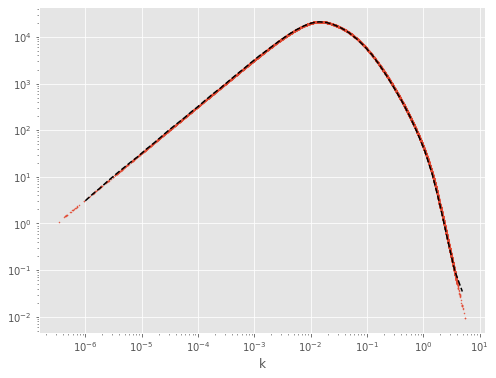

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax.loglog()
ax.plot(klen, mpk, 'o', ms = .5, color = 'C0')

# ax.plot(np.exp(lnk), np.exp(lnp), '--', color = 'C1')

k = np.logspace(-6, np.log(kn), 51)
p = np.exp(pk(np.log(k)))
ax.plot(k, p, '--', color = 'k')

ax.set_xlabel('k'); _axi.set_ylabel('P_meas(k)')

plt.show()